<a href="https://colab.research.google.com/github/EarnerZ/EarnerZ/blob/main/RL_Q_learning_paso_a_paso_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Q-learning (paso a paso)

Basado en:
https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym

https://github.com/dennybritz/reinforcement-learning/blob/master/TD/SARSA%20Solution.ipynb

In [ ]:
!git clone https://github.com/dennybritz/reinforcement-learning.git
import numpy as np
import pprint
import sys
sys.path.append("/content/reinforcement-learning/")
from lib.envs.gridworld import GridworldEnv
from collections import defaultdict

import itertools

Cloning into 'reinforcement-learning'...
remote: Enumerating objects: 1290, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1290 (delta 5), reused 10 (delta 4), pack-reused 1274
Receiving objects: 100% (1290/1290), 5.25 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (826/826), done.


### Leer el entorno

In [ ]:
pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()

In [ ]:
env._render()

T  o  o  o
o  o  o  o
o  o  o  o
o  x  o  T


### Definir funcion auxiliar

In [ ]:

def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.

    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.

    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.

    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / (nA-1)
        best_action = np.argmax(Q[observation])
        A[best_action] = (1.0 - epsilon)
        return A
    return policy_fn



### Q-LEARNING

In [ ]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Q-Learning algorithm: Off-policy TD control. Finds the optimal greedy policy
    while following an epsilon-greedy policy

    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.

    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics

    episode_lengths=np.zeros(num_episodes)
    episode_rewards=np.zeros(num_episodes)

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()

        # Reset the environment and pick the first action
        state = env.reset()

        # One step in the environment
        # total_reward = 0.0
        for t in itertools.count():

            # Take a step
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            episode_rewards[i_episode] += reward
            episode_lengths[i_episode] = t

            # TD Update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            if done:
                break

            state = next_state

    return Q, episode_lengths, episode_rewards

## Paso a paso

In [ ]:
#Parametros
discount_factor=0.9
alpha=0.5
epsilon=0.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Inicializamos
Q = defaultdict(lambda: np.zeros(env.action_space.n))

# The policy we're following
policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

# Reset the environment and pick the first action
state = env.reset()

t = 0

In [ ]:
state = env.reset()

EMPEZAMOS A ENTRENAR

In [ ]:
env._render()

T  x  o  o
o  o  o  o
o  o  o  o
o  o  o  T


In [ ]:
# Valores en el estado actual
print(Q[state])

[ 0.   0.   0.  -0.5]


In [ ]:
 # Probabilidades de tomar cada accion
action_probs = policy(state)
print(action_probs)

[0.9        0.03333333 0.03333333 0.03333333]


In [ ]:
# Elegimos la acción usando un "dado pesado por las probabilidades"
action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
print(action)

0


In [ ]:
action = 3

In [ ]:
# Hacemos la acción y vemos el resultado
next_state, reward, done, _ = env.step(action)
print(next_state)
print(reward)
print(done)

0
-1.0
True


In [ ]:
env._render()


x  o  o  o
o  o  o  o
o  o  o  o
o  o  o  T


In [ ]:
# mejor acción a futuro
best_next_action = np.argmax(Q[next_state])
print(Q[next_state])

[0. 0. 0. 0.]


In [ ]:
print(best_next_action)

0


In [ ]:
# Aplicamos la actualización
print('antes: ' + str(Q[state]))
td_target = reward + discount_factor * Q[next_state][best_next_action]
print('td target: ' + str(td_target))
td_delta = td_target - Q[state][action]
print('td delta: ' + str(td_delta))
#Q[state][action] += alpha * td_delta
Q[state][action] = Q[state][action] + alpha * td_delta
print('despues de actualizar: ' + str(Q[state]))

antes: [ 0.   0.   0.  -0.5]
td target: -1.0
td delta: -0.5
despues de actualizar: [ 0.    0.    0.   -0.75]


In [ ]:
Q

defaultdict(<function __main__.<lambda>()>,
            {13: array([ 0. ,  0. ,  0. , -0.5]),
             12: array([-0.5,  0. ,  0. ,  0. ]),
             8: array([-0.5,  0. ,  0. ,  0. ]),
             4: array([-0.5,  0. ,  0. ,  0. ]),
             0: array([0., 0., 0., 0.]),
             3: array([-0.5  , -0.875, -0.5  , -0.5  ]),
             7: array([-0.5,  0. ,  0. ,  0. ]),
             2: array([ 0. ,  0. ,  0. , -0.5]),
             1: array([ 0.  ,  0.  ,  0.  , -0.75])})

In [ ]:
state = next_state

render state

In [ ]:
Q, stats_episode_lengths, stats_episode_rewards = q_learning(env, 2000)

Episode 2000/2000.

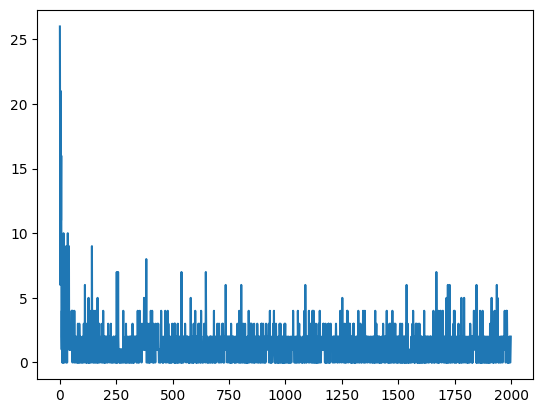

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(stats_episode_lengths)

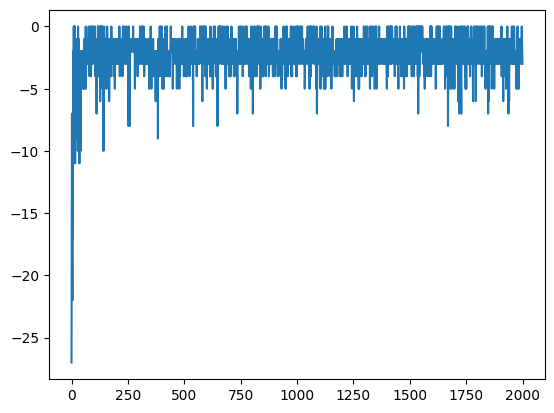

In [ ]:
plt.figure()
plt.plot(stats_episode_rewards)

Action State

In [ ]:
Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {14: array([-2.99869412, -1.        , -1.99969458, -2.99938965]),
             10: array([-3.98476243, -2.        , -2.        , -3.98632075]),
             6: array([-3., -3., -3., -3.]),
             5: array([-2.        , -3.99980734, -3.87062426, -2.        ]),
             1: array([-1.99999809, -2.99998474, -2.99999928, -1.        ]),
             2: array([-2.984375  , -3.9982738 , -3.96963027, -2.        ]),
             3: array([-3.98426236, -3.99039841, -3.        , -3.        ]),
             7: array([-3.99296255, -2.99995422, -2.        , -3.99969644]),
             11: array([-2.99999833, -1.99999988, -1.        , -2.99999915]),
             15: array([0., 0., 0., 0.]),
             12: array([-3.        , -3.        , -3.93661813, -3.3125    ]),
             13: array([-3.93022802, -2.        , -2.99549866, -3.99841956]),
             9: array([-3., -3., -3., -3.]),
             8: array([-2.   

Vamos a ver que ha aprendido!

In [ ]:

done = False
G, reward = 0,0
state = env.reset()
while done != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, info = env.step(action) #2
        #Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        G += reward
        env._render()
        state = state2
print(G)


T  o  o  o
o  o  o  o
o  o  o  o
o  o  x  T
T  o  o  o
o  o  o  o
o  o  o  o
o  o  o  x
-2.0


In [ ]:
politica = np.zeros((16,))

for i in range(15):
    politica[i] = np.argmax(Q[i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
np.reshape(politica,(4,4))

array([[0., 3., 3., 2.],
       [0., 0., 1., 2.],
       [0., 1., 1., 2.],
       [0., 1., 1., 0.]])